In [10]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pandas.read_csv("reviews.csv", parse_dates=["Timestamp"])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### Rating Average/Count by Day

In [20]:
data["Day"] = data["Timestamp"].dt.date
day_average = data.groupby(["Day"]).count()
day_average.head()

,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15


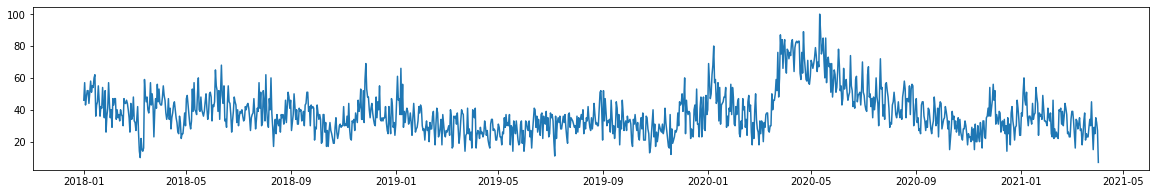

In [31]:
#We give here a size to the graph
plt.figure(figsize = (20, 3))
#We give the x axis and y axis values
plt.plot(day_average.index, day_average["Rating"])

In [14]:
day_average["Rating"].min()

3.7916666666666665

### Rating Average By Week

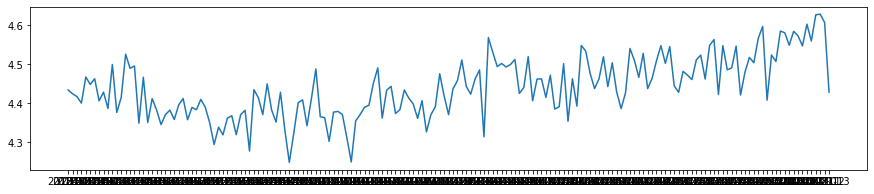

In [30]:
data["Week"] = data["Timestamp"].dt.strftime("%Y-%U")
week_average = data.groupby(["Week"]).mean()

plt.figure(figsize=(15, 3))
plt.plot(week_average.index, week_average["Rating"])

### Average Rating by Month

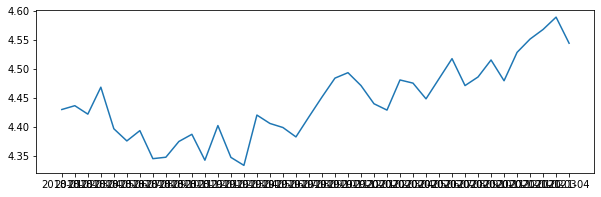

In [33]:
data["Month"] = data["Timestamp"].dt.strftime("%Y-%m")
month_average = data.groupby(["Month"]).mean()

plt.figure(figsize=(10, 3))
plt.plot(month_average.index, month_average["Rating"])

In [35]:
month_average.head()

,Rating
Month,
2018-01,4.429645
2018-02,4.436248
2018-03,4.421671
2018-04,4.468211
2018-05,4.396420


### Average Rating by Month by Course

<AxesSubplot:xlabel='Month'>

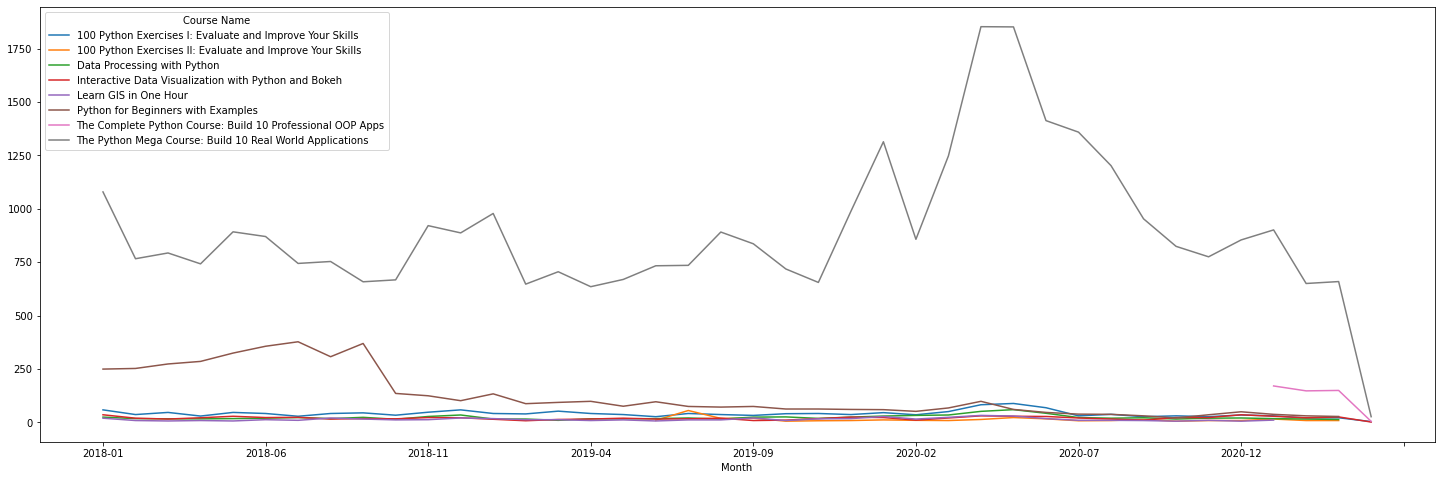

In [45]:
data["Month"] = data["Timestamp"].dt.strftime("%Y-%m")
month_average_crs = data.groupby(["Month", "Course Name"])["Rating"].count().unstack()

month_average_crs.plot(figsize=(25,8))

In [46]:
month_average_crs

Course Name,100 Python Exercises I: Evaluate and Improve Your Skills,100 Python Exercises II: Evaluate and Improve Your Skills,Data Processing with Python,Interactive Data Visualization with Python and Bokeh,Learn GIS in One Hour,Python for Beginners with Examples,The Complete Python Course: Build 10 Professional OOP Apps,The Python Mega Course: Build 10 Real World Applications
Month,,,,,,,,
2018-01,58.0,NaN,24.0,35.0,19.0,249.0,NaN,1079.0
2018-02,36.0,NaN,17.0,19.0,8.0,252.0,NaN,766.0
2018-03,46.0,NaN,16.0,15.0,6.0,273.0,NaN,793.0
2018-04,29.0,NaN,16.0,21.0,8.0,285.0,NaN,742.0
2018-05,46.0,NaN,17.0,28.0,6.0,324.0,NaN,892.0
2018-06,41.0,NaN,19.0,22.0,12.0,356.0,NaN,870.0
2018-07,28.0,NaN,22.0,23.0,9.0,377.0,NaN,744.0
2018-08,41.0,NaN,17.0,15.0,20.0,307.0,NaN,753.0
2018-09,44.0,NaN,23.0,17.0,15.0,369.0,NaN,658.0


### What Day Are People The Happiest?

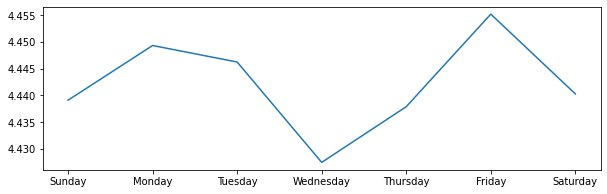

In [61]:
data["Weekday"] = data["Timestamp"].dt.strftime("%A")
data["Daynumber"] = data["Timestamp"].dt.strftime("%w")

weekday_average = data.groupby(["Weekday", "Daynumber"]).mean()
weekday_average = weekday_average.sort_values("Daynumber")

plt.figure(figsize=(10, 3))
plt.plot(weekday_average.index.get_level_values(0), weekday_average["Rating"])

In [68]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : li

### Number of Ratings By Course

In [64]:
share = data.groupby(["Course Name"])["Rating"].count()
share

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x16632f63c10>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609822, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

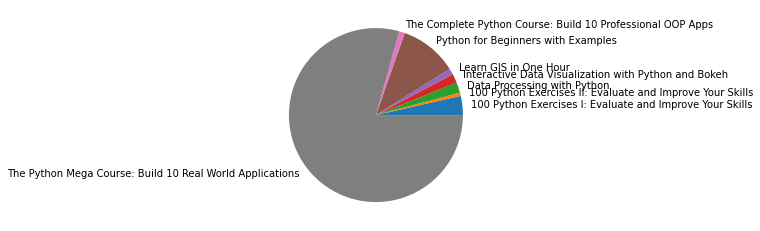

In [67]:
plt.pie(share, labels=share.index)